In [ ]:
"""
Problem Statement:  

Wikipedia is the world’s largest and most popular reference work on the internet with about 500 million unique visitors per month. 
It also has millions of contributors who can make edits to pages. The Talk edit pages, the key community interaction forum where the 
contributing community interacts or discusses or debates about the changes pertaining to a particular topic. 

Wikipedia continuously strives to help online discussion become more productive and respectful. You are a data scientist at Wikipedia 
who will help Wikipedia to build a predictive model that identifies toxic comments in the discussion and marks them for cleanup by using
NLP and machine learning. Post that, help identify the top terms from the toxic comments. 

Domain: Internet

Analysis to be done: Build a text classification model using NLP and machine learning that detects toxic comments.
"""

In [1]:
#importing required libraries and the dataset
import pandas as pd
wiki_df = pd.read_csv("E:/Education/PGP Simplilearn-Purdue/PGP in Data Science/Natural Language Processing/Assessement Projects/Wikipedia Toxicity/train.csv")
wiki_df.head()

,id,comment_text,toxic
0,e617e2489abe9bca,"""\r\n\r\n A barnstar for you! \r\n\r\n The De...",0
1,9250cf637294e09d,"""\r\n\r\nThis seems unbalanced. whatever I ha...",0
2,ce1aa4592d5240ca,"Marya Dzmitruk was born in Minsk, Belarus in M...",0
3,48105766ff7f075b,"""\r\n\r\nTalkback\r\n\r\n Dear Celestia... """,0
4,0543d4f82e5470b6,New Categories \r\n\r\nI honestly think that w...,0


In [2]:
#Exploratory Data Analysis
#Checking for null values
wiki_df.isna().sum()
#Observations:
#No null values are present

id              0
comment_text    0
toxic           0
dtype: int64

In [3]:
#Checking for duplicates
wiki_df.duplicated().sum()
#Observations:
#No duplicate values are present

0

In [4]:
#Checking the composition of toxic vs non-toxic comments
wiki_df.toxic.value_counts(normalize=True)*100
#Observations:
#Non-toxic comments(91.26%) outweigh toxic comments(8.74%) => Model might be biased towards non-toxic comments as the dataset is unbalanced

0    91.26
1     8.74
Name: toxic, dtype: float64

In [5]:
#Using predefined list of stop words in nltk
from nltk.corpus import stopwords
stopwords1 = stopwords.words('english')
print(type(stopwords1))
print(stopwords1[0:10])
print("Total no.of stopwords:",len(stopwords1))

<class 'list'>
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
Total no.of stopwords: 179


In [6]:
#Punctuation Marks
from string import punctuation
print(punctuation)
print("Total Punctation Marks:",len(punctuation))

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
Total Punctation Marks: 32


In [7]:
#Appending puctuation to list of stop words
stopwords_punct = stopwords1 + list(punctuation)
print(type(stopwords_punct))
print(len(stopwords_punct))
print(stopwords_punct)

<class 'list'>
211
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'sam

In [8]:
#Cleanup:--Defining a function for cleaning up the data 
#Using regular expressions, remove IP addresses
#Using regular expressions, remove URLs
#Normalize the casing
#Tokenize using word_tokenize from NLTK
#Remove stop words
#Remove punctuation

#Function for cleaning up comments
import re
from nltk import word_tokenize

def clean_text(comment):
    comment_ip_cleaned = re.sub( r'[0-9]+(?:\.[0-9]+){3}',"",comment,flags=re.MULTILINE)
    comment_url_cleaned = re.sub(r'(http|https)?:\/\/(\w|\W)*\b',"",comment_ip_cleaned,flags=re.MULTILINE)
    x1 = word_tokenize(comment_url_cleaned.lower())
    x2 = [x for x in x1 if x not in stopwords_punct]
    return ' '.join(x2)

In [9]:
#Creating a new column with cleaned up comments
wiki_df['clean_comments'] = wiki_df['comment_text'].apply(clean_text)
wiki_df.head()

,id,comment_text,toxic,clean_comments
0,e617e2489abe9bca,"""\r\n\r\n A barnstar for you! \r\n\r\n The De...",0,`` barnstar defender wiki barnstar like edit k...
1,9250cf637294e09d,"""\r\n\r\nThis seems unbalanced. whatever I ha...",0,`` seems unbalanced whatever said mathsci said...
2,ce1aa4592d5240ca,"Marya Dzmitruk was born in Minsk, Belarus in M...",0,marya dzmitruk born minsk belarus march 19 199...
3,48105766ff7f075b,"""\r\n\r\nTalkback\r\n\r\n Dear Celestia... """,0,`` talkback dear celestia ... ``
4,0543d4f82e5470b6,New Categories \r\n\r\nI honestly think that w...,0,new categories honestly think need add categor...


In [10]:
#Verifying cleanup function with sample comment
print(wiki_df['comment_text'][4],"\n")
print(wiki_df['clean_comments'][4])

New Categories 

I honestly think that we need to add some more categories and move some characters into these new categories. Like, characters such as Pete Ross or Whitney Fordman who haven't been on the show in a while, and are listed as main characters? That just doesn't make sense. Perhaps creating a deceased/former characters section? I'll start doing it now. If anyone has a problem, please post it in this discussion. 

new categories honestly think need add categories move characters new categories like characters pete ross whitney fordman n't show listed main characters n't make sense perhaps creating deceased/former characters section 'll start anyone problem please post discussion


In [11]:
#Using a counter, find the top terms in the data. 
#Can any of these be considered contextual stop words? 
#Words like “Wikipedia”, “page”, “edit” are examples of contextual stop words
#If yes, drop these from the data

from collections import Counter
x1 = ' '.join(wiki_df['clean_comments'])
Counter(x1.split()).most_common(30)

#Observations:
#Some tokens such as '',``,'s,page,wikipedia,edit,'m, ...,'re doesnot add any value to the model
#Dropping these would reduce computational load on the model

[("''", 7229),
 ('``', 4748),
 ("'s", 1959),
 ("n't", 1774),
 ('article', 1691),
 ('page', 1478),
 ('wikipedia', 1400),
 ('talk', 1148),
 ('please', 1010),
 ('would', 990),
 ('ass', 985),
 ('fuck', 906),
 ('one', 844),
 ('like', 822),
 ('also', 631),
 ('think', 620),
 ('see', 614),
 ('know', 580),
 ('edit', 556),
 ('people', 547),
 ('use', 533),
 ('name', 532),
 ("'m", 528),
 ('may', 521),
 ('articles', 483),
 ('time', 471),
 ('...', 460),
 ('thanks', 417),
 ('user', 408),
 ("'re", 400)]

In [12]:
#Dropping contextual stop words and other punctuation from the data
context_sw = ["''","``","'s","page","wikipedia","edit","'m","...","'re"]
def remove_csw(text):
    tokens = word_tokenize(text)
    new_text = [x for x in tokens if x not in context_sw]
    return ' '.join(new_text)

In [13]:
#Sample Check
remove_csw(wiki_df['clean_comments'][0])

'barnstar defender wiki barnstar like kayastha lets form solidarity group malign article subject matter propose folloing name group united intellectuals front kayastha ethinicty racist castist abuse uifkearca'

In [14]:
#Applying it on the cleaneed up comments
wiki_df['clean_comments1'] = wiki_df['clean_comments'].apply(remove_csw)
wiki_df.head()

,id,comment_text,toxic,clean_comments,clean_comments1
0,e617e2489abe9bca,"""\r\n\r\n A barnstar for you! \r\n\r\n The De...",0,`` barnstar defender wiki barnstar like edit k...,barnstar defender wiki barnstar like kayastha ...
1,9250cf637294e09d,"""\r\n\r\nThis seems unbalanced. whatever I ha...",0,`` seems unbalanced whatever said mathsci said...,seems unbalanced whatever said mathsci said fa...
2,ce1aa4592d5240ca,"Marya Dzmitruk was born in Minsk, Belarus in M...",0,marya dzmitruk born minsk belarus march 19 199...,marya dzmitruk born minsk belarus march 19 199...
3,48105766ff7f075b,"""\r\n\r\nTalkback\r\n\r\n Dear Celestia... """,0,`` talkback dear celestia ... ``,talkback dear celestia
4,0543d4f82e5470b6,New Categories \r\n\r\nI honestly think that w...,0,new categories honestly think need add categor...,new categories honestly think need add categor...


In [27]:
#Separate into train and test sets
#Use train-test method to divide your data into 2 sets: train and test
#Use a 70-30 split
from sklearn.model_selection import train_test_split

x = wiki_df['clean_comments1']
y = wiki_df['toxic']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3500,)
(1500,)
(3500,)
(1500,)


In [28]:
#Use TF-IDF values for the terms as feature to get into a vector space model
#Import TF-IDF vectorizer from sklearn
#Instantiate with a maximum of 4000 terms in your vocabulary
#Fit and apply on the train set
#Apply on the test set
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_features=4000)

tfidf_x_train = tfidf_vect.fit_transform(x_train).toarray()
tfidf_x_test = tfidf_vect.transform(x_test).toarray()

print(tfidf_x_train.shape)
print(tfidf_x_test.shape)

(3500, 4000)
(1500, 4000)


In [29]:
#Model building: Support Vector Machine
#Instantiate SVC from sklearn with a linear kernel
#Fit on the train data
from sklearn.svm import SVC

clf = SVC(kernel='linear')
clf.fit(tfidf_x_train,y_train)

SVC(kernel='linear')

In [25]:
#Make predictions for the test set
y_pred = clf.predict(tfidf_x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
pd.Series(y_pred).value_counts()
#Observations:
#Majority of the comments are predicted as non-toxic (as expected since the dataset is unbalanced)   

0    1447
1      53
dtype: int64

In [20]:
#Model evaluation: Accuracy, recall, and f1_score
#Report the accuracy on the train set
#Report the recall on the train set:decent, high, low?
#Get the f1_score on the train set
from sklearn import metrics

print(metrics.classification_report(y_test,y_pred))
#Observations:
#Due to class imbalance, the model seems to focus on 0's
#126 toxic comments are also predicted as non-toxic
#Accuracy: 95%

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1374
           1       0.92      0.39      0.55       126

    accuracy                           0.95      1500
   macro avg       0.94      0.69      0.76      1500
weighted avg       0.94      0.95      0.94      1500



In [21]:
#Looks like you need to adjust  the class imbalance, as the model seems to focus on the 0s
#Adjust the appropriate parameter in the SVC module
#Train again with the adjustment and evaluate
#Train the model on the train set

clf1 = SVC(kernel='linear',class_weight='balanced')
clf1.fit(tfidf_x_train,y_train)

SVC(class_weight='balanced', kernel='linear')

In [22]:
#Evaluate the predictions on the validation set: accuracy, recall, f1_score
y_pred = clf1.predict(tfidf_x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
print(metrics.classification_report(y_test,y_pred))
#Observations:
#Precision, recall and f1_score have increased to 64%, 60% and 61% respectively
#Accuracy: 94%

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1374
           1       0.64      0.60      0.61       126

    accuracy                           0.94      1500
   macro avg       0.80      0.78      0.79      1500
weighted avg       0.94      0.94      0.94      1500



In [85]:
#Hyperparameter tuning
#Import GridSearch and StratifiedKFold (because of class imbalance)
#Provide the parameter grid to choose for ‘C’
#Use a balanced class weight while instantiating the Support Vector Classifier
#Find the parameters with the best recall in cross validation
#Choose ‘recall’ as the metric for scoring
#Choose stratified 5 fold cross validation scheme
#Fit on the train set
from sklearn.model_selection import GridSearchCV

#defining grid parameters
param_grid = {'C':[0.01,0.1,1,10,100]}
grid = GridSearchCV(SVC(class_weight = 'balanced'),param_grid,cv=5,scoring = metrics.make_scorer(metrics.recall_score),verbose = 3)

#fitting the grid model
grid.fit(tfidf_x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.000, total= 1.7min
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.7min remaining:    0.0s


[CV] .............................. C=0.01, score=0.000, total= 1.7min
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.4min remaining:    0.0s


[CV] .............................. C=0.01, score=0.000, total= 1.7min
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.000, total= 1.7min
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=1.000, total= 1.7min
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.323, total= 1.7min
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.371, total= 1.6min
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.274, total= 1.7min
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.226, total= 1.7min
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed: 35.0min finished


GridSearchCV(cv=5, estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]},
             scoring=make_scorer(recall_score), verbose=3)

In [86]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 1}
SVC(C=1, class_weight='balanced')


In [51]:
#Predict and evaluate using the best estimator
#Use best estimator from the grid search to make predictions on the test set

clf2 = SVC(kernel='linear',class_weight='balanced',C = 1)
clf2.fit(tfidf_x_train,y_train)

SVC(C=1, class_weight='balanced', kernel='linear')

In [52]:
#What is the recall on the test set for the toxic comments?
#What is the f1_score?
y_pred = clf2.predict(tfidf_x_test)
print(metrics.classification_report(y_test,y_pred))
#Observations:
#Recall: 60%
#f1-score: 61%

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1374
           1       0.64      0.60      0.61       126

    accuracy                           0.94      1500
   macro avg       0.80      0.78      0.79      1500
weighted avg       0.94      0.94      0.94      1500



In [54]:
#What are the most prominent terms in the toxic comments?
toxic_comm = wiki_df.clean_comments1[wiki_df.toxic==1]

from collections import Counter
x1 = ' '.join(toxic_comm)
Counter(x1.split()).most_common(30)

[('ass', 980),
 ('fuck', 903),
 ('suck', 373),
 ('mexicans', 356),
 ('fucking', 276),
 ('gay', 231),
 ('nigger', 190),
 ("n't", 170),
 ('die', 162),
 ('must', 161),
 ('wales', 159),
 ('jim', 157),
 ('cuntbag', 126),
 ('====', 125),
 ('shit', 119),
 ('bastard', 117),
 ('pro-assad.hanibal911you', 106),
 ('eat', 101),
 ('hate', 100),
 ('admins', 98),
 ('cocksucking', 96),
 ('cunts', 96),
 ('jews', 89),
 ('niggers', 82),
 ('power', 81),
 ('spics', 80),
 ('minorities', 80),
 ('abusing', 78),
 ('proof', 77),
 ('latinus', 76)]

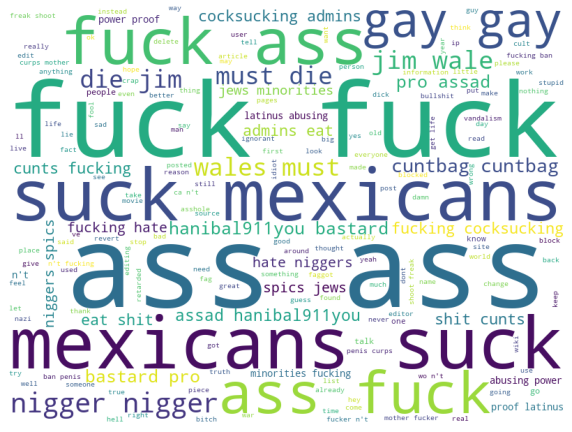

In [55]:
#Word Cloud for toxic comments
from wordcloud import WordCloud
import matplotlib.pyplot as plt

toxic_wc = WordCloud(width = 800,height = 600,background_color='white',min_font_size=10).generate(x1)
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(toxic_wc)

In [81]:
#Separate the comments from the test set that the model identified as toxic
#Make one large list of the terms
#Get the top 15 terms
comments = pd.DataFrame(x_test).reset_index(drop=True)
actual = pd.DataFrame(y_test).reset_index(drop=True)
predictions = pd.DataFrame(y_pred).reset_index(drop=True)
act_pred = pd.concat([comments,actual,predictions],axis=1)
act_pred

,clean_comments1,toxic,0
0,hey man sure aware good literature inc find ce...,0,0
1,derild4921 sadads main dispute sourcing origin...,0,0
2,journal rheumatology article ocaasi chance rea...,0,0
3,david speaking,0,0
4,durrr .. oms really believe needed explain eve...,0,0
...,...,...,...
1495,listing eric w. hill position 26 years seemed ...,0,0
1496,ga review review transcluded talk italian crui...,0,0
1497,well way dealing course guess n't think prod w...,0,0
1498,redirect user talk codedon/archives/my rocky b...,0,0


In [82]:
act_pred.columns = ['Comments','Actual','Predicted']
act_pred

,Comments,Actual,Predicted
0,hey man sure aware good literature inc find ce...,0,0
1,derild4921 sadads main dispute sourcing origin...,0,0
2,journal rheumatology article ocaasi chance rea...,0,0
3,david speaking,0,0
4,durrr .. oms really believe needed explain eve...,0,0
...,...,...,...
1495,listing eric w. hill position 26 years seemed ...,0,0
1496,ga review review transcluded talk italian crui...,0,0
1497,well way dealing course guess n't think prod w...,0,0
1498,redirect user talk codedon/archives/my rocky b...,0,0


In [83]:
#Separate the comments from the test set that the model identified as toxic
toxic_comm = act_pred.Comments[act_pred.Predicted==1]
toxic_comm

7       yeah wording u.s. regulations defining bourbon...
15      22 september 2005 utc shall covet neighbor hou...
18                             bbsrock put sucks big cock
21       gwernol likes prostate massage local congressman
22      editing back n't think death utterly convienen...
                              ...                        
1380    willl seeeeeeee self-styled dorks so-called se...
1432                       apologized already prior block
1437                               u guys fucking morrons
1449                       giant gippsland earthworms eat
1472                             filthy fuck go fuck self
Name: Comments, Length: 118, dtype: object

In [84]:
#Make one large list of the terms
#Get the top 15 terms
from collections import Counter
x1 = ' '.join(toxic_comm)
Counter(x1.split()).most_common(15)

[('suck', 360),
 ('mexicans', 356),
 ('nigger', 182),
 ("n't", 39),
 ('people', 21),
 ('fuck', 19),
 ('like', 19),
 ('fucking', 17),
 ('go', 16),
 ('get', 13),
 ('hate', 11),
 ('one', 9),
 ('shit', 9),
 ('block', 9),
 ('stop', 9)]